# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

## Additional Comments


* In the workplace, **projects are not done using Kaggle data**, but instead, the data comes from multiple data sources that may be hosted internally (like in a data warehouse) or outside your company. For this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never been pushed to a public repository** due to security reasons. Just for this project learning context, we are hosting the data in a public repo.


---

# Install python packages in the notebooks

In [1]:
%pip install -r /workspace/pp5-house-price-prediction 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

Note: you may need to restart the kernel to use updated packages.
Requirements installed.


In [1]:

import os
import numpy
import zipfile
import shutil
import random
import joblib
import zipfile

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
print('Current folder: ' + current_dir)
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('New folder: ' + current_dir)

Current folder: /workspace/pp5-house-price-prediction/jupyter_notebooks
New folder: /workspace/pp5-house-price-prediction


# Download dataset from kaggle
- Install Kaggle, configure the directory, and set permissions for the Kaggle authentication JSON.
- Download the Kaggle dataset.
- Unzip the file and delete the zip file and unlabeled images.

In [4]:
# Install Kaggle API
%pip install kaggle==1.5.12 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

# Set Kaggle config directory for authentication
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Make sure kaggle.json file has correct permissions (only if you're using Colab or Jupyter)
!chmod 600 kaggle.json
print('Directory configured and permissions set.')

# Download the dataset
!kaggle datasets download -d camnugent/california-housing-prices



Note: you may need to restart the kernel to use updated packages.
Requirements installed.
chmod: cannot access 'kaggle.json': No such file or directory
Directory configured and permissions set.
Traceback (most recent call last):
  File "/workspace/.pip-modules/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/workspace/.pip-modules/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/workspace/.pip-modules/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /workspace/pp5-house-price-prediction. Or use the environment method.


---

# Loading dataset & exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the csv file in to the workspace


In [6]:
data = pd.read_csv("housing.csv")

Check the data for any errors

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Checking for non-null values

In [8]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

remove all rows with missing values (NaN) from the DataFrame data. The inplace=True part means it modifies the original DataFrame directly without needing to create a new one.

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


X = data.drop(["median_house_value"], axis=1) creates the feature set by removing the target column, and y = data["median_house_value"] defines the target variable for prediction.

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

split the dataset into 80% for training and 20% for testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
train_data = X_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11707,-120.06,39.15,22.0,2213.0,372.0,98.0,42.0,1.1912,INLAND,170000.0
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,NEAR BAY,163400.0
3550,-118.64,34.22,25.0,2762.0,410.0,1166.0,439.0,6.8643,<1H OCEAN,333700.0
5761,-118.29,34.18,10.0,4292.0,1075.0,2719.0,987.0,3.6974,<1H OCEAN,286600.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY,269700.0
...,...,...,...,...,...,...,...,...,...,...
15918,-122.42,37.74,52.0,1540.0,370.0,1136.0,363.0,4.3125,NEAR BAY,243000.0
15632,-122.41,37.80,52.0,1394.0,395.0,1700.0,400.0,2.7500,NEAR BAY,168800.0
16331,-121.33,38.02,37.0,1964.0,315.0,915.0,335.0,4.3008,INLAND,119800.0
3578,-118.53,34.24,24.0,2718.0,719.0,3018.0,644.0,2.9076,<1H OCEAN,275300.0


create histograms for each numeric column in train_data, with a larger plot size for better visibility.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

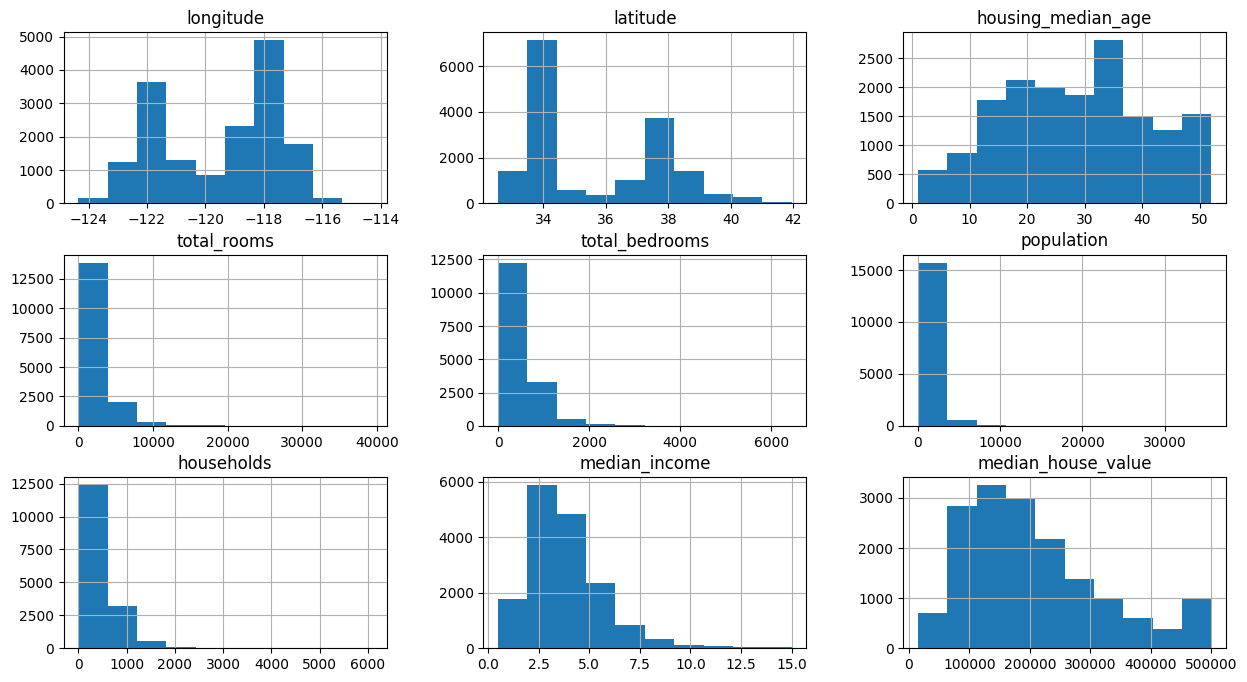

In [15]:
train_data.hist(figsize=(15,8))

This generates a heatmap of the correlation matrix for numeric columns in train_data, with annotations showing the correlation values, using a yellow-green-blue color palette for visualization.

<AxesSubplot:>

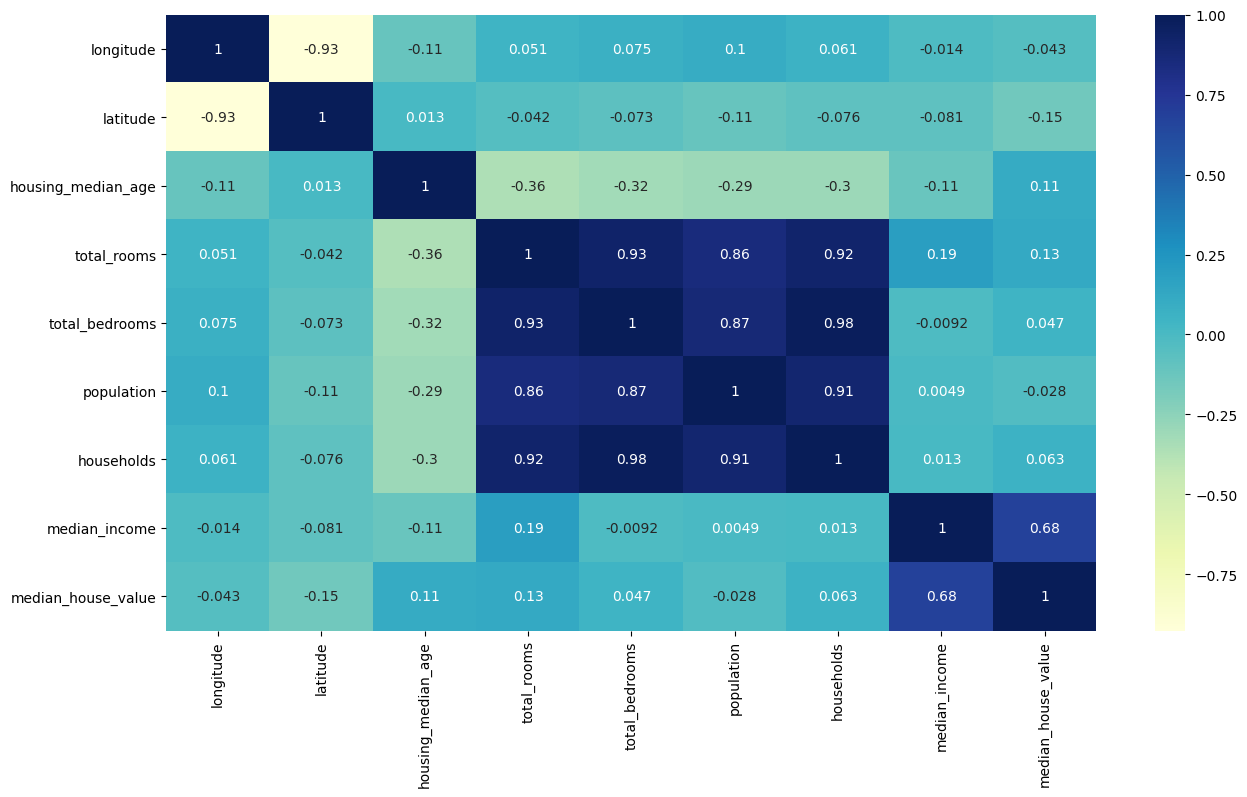

In [16]:
plt.figure(figsize=(15,8))
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

## Conclusions and Next Steps

Dataset has been downloaded and prepared for analysis
proceed to next notebook for Data preprocessing